In [44]:
import sys; sys.path.append('/home/clair/wwa'); from wwa import *

## **Time series plots**

In [65]:
mswep, tamsat, cpc = [merge_byindex([pd.read_csv(fnm, comment = "#", sep = " ", header = None, names = ["year", re.sub(".dat", "", fnm.split("_")[3])], index_col = "year") for fnm in glob.glob("ts/*"+obs+"*")]) for obs in ["mswep", "tamsat", "cpc"]]

mswep, tamsat, cpc = [merge_byindex([df[[c]] / int(c[2:-3]) for c in df.columns]) for df in [mswep, tamsat, cpc]]



<AxesSubplot: xlabel='year'>

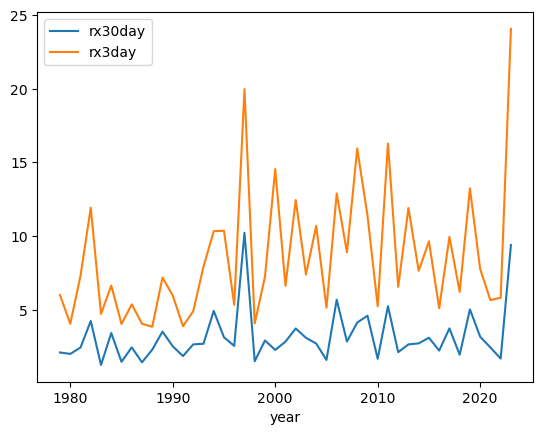

In [68]:
cpc.plot()

## **Synthesis plots**

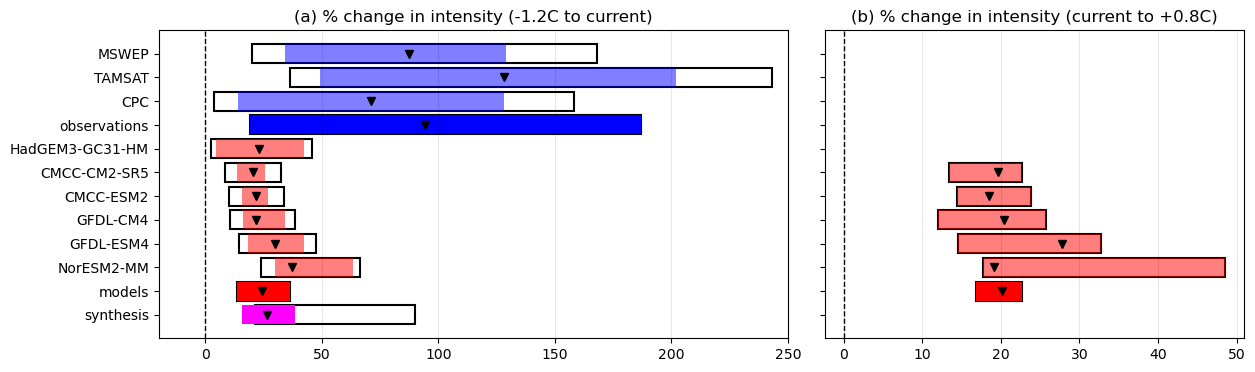

In [5]:
varnm = "rx30day-iod"

df = {t+"_"+time : pd.read_fwf("synthesis/synth_"+varnm+"_"+t+"_"+time+".txt", comment = "#", header = None, widths = [5,5,12,12,12,12,12,4,99], 
                 names = ["y0", "y1", "est", "lower", "upper", "l_wb", "u_wb", "group", "model"], index_col = "model") for time in ["past", "proj"] for t in ["pr", "di"]}

mdl_list = df["di_past"].index

################################################################################################################################################

fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (14,4), dpi = 100, sharey = True, gridspec_kw = {"width_ratios" : [1.5,1]})
plt.subplots_adjust(wspace = 0.07, hspace = 0.25)

gcols = ["blue", "blue", "red", "red", "magenta"]
galpha = [0.5,1,0.5,1,1]

for ax in axs: ax.axvline(0, ls = "--", color = "k", lw = 1, zorder = -99)
    
for i in range(2):
    ax = axs[i]
    period = ["past", "proj"][i]
    res = df["di_"+period]
    
    ttl = "("+["a","b"][i]+ ") % change in intensity"+" "+["(-1.2C to current)", "(current to +0.8C)"][i]
    ax.set_title(ttl)
    
    ax.grid(axis = "x", color = "k", alpha = 0.1, ls = "-", zorder = -99)
    
    for m in res.index:
        if m in mdl_list:
            k = list(mdl_list).index(m)
            r = res.loc[m]

            ax.add_patch(Rectangle((r.l_wb,-k-0.4), r.u_wb - r.l_wb, 0.8, edgecolor = "k", facecolor = "w", lw = 1.5))
            ax.add_patch(Rectangle((r.lower,-k-0.4), r.upper - r.lower, 0.8, facecolor = gcols[int(r.group)-1], alpha = galpha[int(r.group)-1]))

            ax.plot(r.est, -k, color = "k", marker = "v")  

axs[0].set_yticks(range(0, -len(mdl_list), -1))
axs[0].set_yticklabels([re.sub('"', '', r.split(" ")[0]).strip() for r in mdl_list])

axs[0].set_xlim(-20,250)
# axs[1].set_xlim(-20,50)


plt.savefig("fig/synthesis-intchange_"+varnm+".png")

## **IOD correlations**

In [20]:
iod_mdl = {ds : pd.read_csv("res/res-"+ds+"_iod.csv", index_col = 0).dropna(axis = 0, how = "any") for ds in ["highresmip", "cmip6", "cordex"]}
iod_obs = pd.read_csv("res/res-obs_iod.csv", index_col = 0)

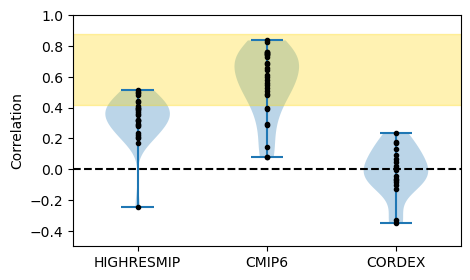

In [41]:
fig, ax = plt.subplots(ncols = 1, figsize = (5,3), dpi = 100)

ax.violinplot([res.iod_rx30d_2023 for res in iod_mdl.values()])
ax.set_xticks([1,2,3])
ax.set_xticklabels([k.upper() for k in iod_mdl.keys()])

ax.set_ylim(-0.5,1)
ax.set_ylabel("Correlation")

ax.axhline(0, color = "k", ls = "--")
# ax.axhline(iod_obs.est.mean(), color = "goldenrod", alpha = 0.7)

ax.add_patch(Rectangle((0, iod_obs["2.5%"].min()), 4, iod_obs["97.5%"].max() - iod_obs["2.5%"].min(), color = "gold", alpha = 0.3))

for i in range(3):
    ax.plot([i+1] * len(iod_mdl[list(iod_mdl.keys())[i]]), iod_mdl[list(iod_mdl.keys())[i]].iod_rx30d_2023, ls = "", marker = ".", color = "k")
    
ax.set_xlim(0.5,3.5)
    
plt.savefig("fig/iod-correlation-in-models.png")